# MRMR

- [Feature Selection in Machine Learning Book](https://www.trainindata.com/p/feature-selection-in-machine-learning-book)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from feature_engine.selection import MRMR

In [2]:
# load dataset

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
y = y.map({0:1, 1:0})

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=3
)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.8,1724.0,0.1782,0.3841,0.5754,0.18720,0.3258,0.09720
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.15710,0.3206,0.06938
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.2,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234
329,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,...,17.73,25.21,113.7,975.2,0.1426,0.2116,0.3344,0.10470,0.2736,0.07953
201,17.54,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,20.42,25.84,139.5,1239.0,0.1381,0.3420,0.3508,0.19390,0.2928,0.07867


## Feature-engine

In [3]:
sel = MRMR(method="FCQ", regression=False)

sel.fit(X_train, y_train)

MRMR(method='FCQ')

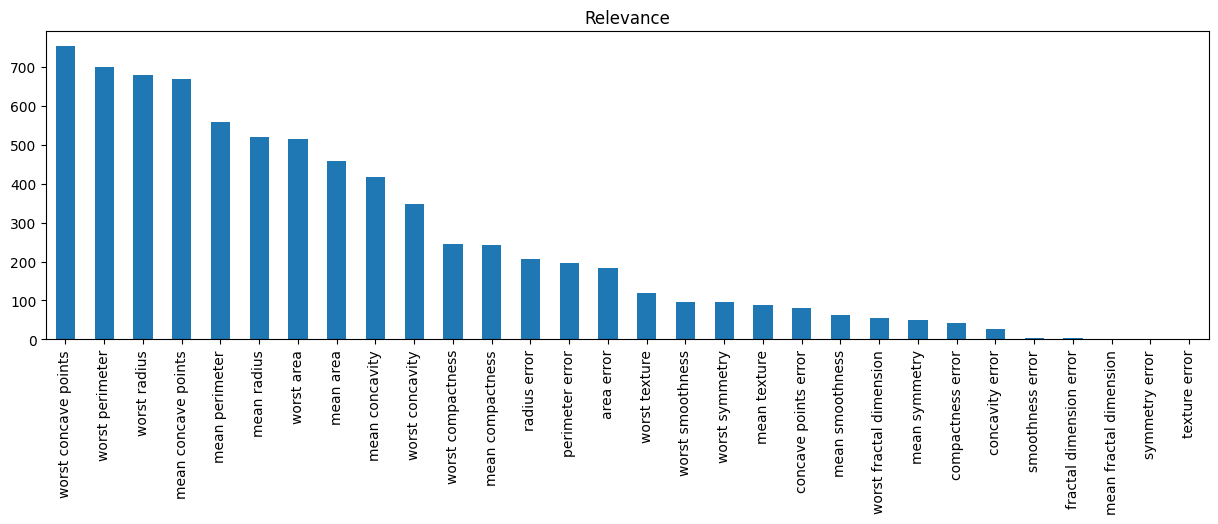

In [4]:
pd.Series(sel.relevance_, index=sel.variables_).sort_values(
    ascending=False).plot.bar(figsize=(15, 4))
plt.title("Relevance")
plt.show()

In [5]:
# the features to remove

sel.features_to_drop_

['mean radius',
 'mean texture',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst symmetry',
 'worst fractal dimension']

In [6]:
# reduce dataset

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_test_t.head()

,mean perimeter,mean concave points,worst radius,worst perimeter,worst area,worst concave points
266,69.28,0.02642,11.88,78.28,424.8,0.07926
448,94.25,0.02925,16.30,108.10,830.5,0.09594
420,74.20,0.01428,13.07,86.43,520.5,0.06664
493,78.83,0.01149,13.19,83.24,534.0,0.02680
321,131.10,0.07726,23.06,150.20,1657.0,0.14250
